# Regression Predict Student Solution

© Explore Data Science Academy

---

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


For this project, there are several packages that will be used to carry out various tasks from loading the data to the final phase of predictive modeling. They are **Pandas & Numpy** for Data Manipulation & analysis, **Seaborn & Matplotlib** for Data Visualization, and **Scipy + Sklearn** for Data Preprocessing, Model Building, and Evaluation. 

We will now import our packages:

In [1]:
# Libraries for Data Loading & Manipulation: 
import pandas as pd
import numpy as np

# Libraries for Data Visualisation:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr

# Libraries for Data Preprocessing and Model Building:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries for Model Building:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Libraries for Model Evaluation:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Libraries for Model Saving:
import pickle

# Error Handling 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# set the default font size of all visuals to 16
plt.rcParams['font.size'] = 16 

# Setting global constants to ensure notebook results are reproducible
SEED = 1 # random state to be used

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



The Data will be obtained from the *`df_train.csv`* file and will be loaded into the project as a Pandas Data Frame. This will require the use of the Pandas `.read_csv()` function.

In [2]:
# Loading the data:
df = pd.read_csv("df_train.csv", parse_dates=['time'])

# setting the maximum number of columns to be displayed to unlimited
pd.set_option("display.max_columns", None) 

By adding the *`parse_dates`* argument and assigning the value *`['time']`*, we are preemptively resolving any potential problems that may exist involving the datatype of the **time** column. We  used an option in Pandas (*display.max_columns*) that will enable us to view all the columns of the data frame regardless of the number.

In [3]:
# Create Copy of the dataframe
df1 = df.copy()

By creating a **copy()** of the data frame, we are preventing any potentially irreversible changes from occurring in the original data. This leaves the option of starting afresh with the original data if the need arises.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


We need to obtain and understand the information about the data frame we created. Summary Statistics and correlation are among the tasks that should be performed. For this, we will need to perform **E**xploratory **D**ata **A**nalysis **(EDA)**. 

#### i) Display the Data

We will begin by viewing the first few rows of the Dataframe: 

In [4]:
# Displaying the first 5 rows:
df1.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


There are a few observations that can be made from the above displayed:
- The data has been collected from 5 cities: Barcelona, Bilbao, Madrid, Seville and Valencia.
- The time column records 3-hour time intervals in which the individual records were collected.
- The first column, **Unnamed: 0** appears to be a duplicate of the data frame's index, it will be dropped later at the data preprocessing stage of this project.
- The **Valencia_wind_deg** column contains data representing the strength of the wind in 10 Levels.
- **Seville_pressure** column records measured units of pressure as categorical values, using the prefix **sp** (Static Pressure)
- There are also columns containing zero(0) values. 

#### ii) Examine the Data

 We will use the `.info()` function, next, to display some important details about the Data frame. For example, the columns with their respective datatype represented by 'Dtype' and the presence of empty cells by examining the 'Non-Null Count'

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

From the information provided above, it can be observed that:
- The dataset contains, __8763__ rows and __49__ columns/features.
- There are two(2) categorical columns/features, denoted as _object_ dtype, with the remaining __46__ are numeric in nature.
- The categorical variables, **Valencia_wind_deg** and **Seville_pressure** will be converted into numeric through Dummy Variable Encoding at the Feature Engineering stage. 
- The **time** column has a **datetime64** dtype. This was guaranteed at the time we created the data frame by parsing the column appropriately.
- The **Valencia_pressure** column has missing values. These will be filled in with the average/mean value of the entire column at the Feature Engineering stage.

#### iii) Display Missing Values

 Next, we will display the columns with missing values along with their respective counts for each.

In [6]:
# get the total number of null values per column
missing = pd.DataFrame(df1.isnull().sum(), columns=['null_values'])

# calculate the percentage of missing values
missing['null_values_%'] = round((df1.isnull().sum() / len(df1)) * 100)

missing

,null_values,null_values_%
Unnamed: 0,0,0.0
time,0,0.0
Madrid_wind_speed,0,0.0
Valencia_wind_deg,0,0.0
Bilbao_rain_1h,0,0.0
Valencia_wind_speed,0,0.0
Seville_humidity,0,0.0
Madrid_humidity,0,0.0
Bilbao_clouds_all,0,0.0
Bilbao_wind_speed,0,0.0


In general, we have a rather clean dataset, except for column __Valencia_pressure__ which has __2068__ rows that are missing values. This is __24%__ of the column that is missing data. This means that it would be appropriate to proceed with filling in the missing values.

#### iv) Descriptive Statistics

An important part of our **EDA** is to observe the descriptive statistics of our dataset. This will be the next step.
For this, we will use the `.describe()` function on our data frame. The expected output will include values representing **mean, std, min, max**, etc.

In [7]:
# describe the dataframe and transpose 
# to get a better looking output
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


From the above displayed descriptive statistics, we can see that the columns with zero(0) values continue to display the same as the minimum values, **min** and in the lower quartile  for the most part. These columns contain records of weather phenomenons such as cloud cover, rain and snow. The zero(0) values indicate that the weather phenomenon did not occur.

We can also observe that for some features (features that describe cloud cover, rain and snowfall), there is a wide margin between the mean value and maximum value.This is as a result of the presence of outliers in these features. This will be handled during feature engineering.

It is important that we also take a look at the distribution of the target/dependent variable, which is the **load_shortfall_3h** column, using the distribution plot functionality of the *Seaborn* Library.

<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

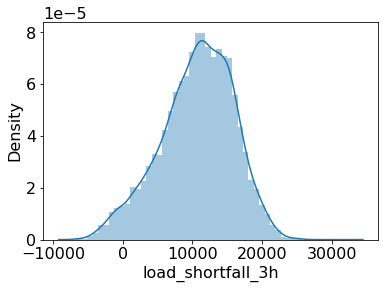

In [8]:
# plot the distribution of the target variable
# using seaborn's distplot
sns.distplot(df1['load_shortfall_3h'])

The target variable is close enough to the Gaussian Distribution or Normal Distribution.

#### v) Examine Skew & Kurtosis

We need to add onto the information we have gathered so far, therefore establishing the Skewness and the Kurtosis of our entire dataset would provide more useful information.

In [9]:
# check skewness of the dataframe
df1.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

It appears that we have a few features that are heavily skewed, with values __>1__. However, it is good enough that our target variable __load_shortfall_3h__ is fairly symmetrical.

In [10]:
# Displaying Skewed Features with values greater than 1 
skewed = df1.skew().loc[lambda x: abs(x) > 1]
skewed

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Barcelona_wind_speed     1.057331
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Madrid_pressure         -1.850768
Bilbao_weather_id       -1.234844
dtype: float64

There are __22__ highly skewed features in the dataset. This is possibly due to the fact that most of the data points for these features are zeros

We shall proceed by checking for Outliers in our Dataset. This can be done by displaying the Kurtosis of the dataset.

In [11]:
# Displaying Kurtosis
df1.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

In [12]:
# Displaying Outliers
# Kurtosis with values greater than 3
outliers = df1.kurtosis().loc[lambda x: x > 3]
outliers

Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Bilbao_wind_speed          3.631565
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Seville_weather_id        10.710308
dtype: float64

It is evident that a few of the features have outliers with Kurtosis figures __>3__. This can also be explained by the fact that most of the data points of these columns are __0.0__ and a few above zero will tend to act as outliers which can have adverse effects on our regression based model. This will therefore be addressed through Data Standardization.
Standardization, also known as Z-Score Standardization, is a type of data scaling. It can be applied to a dataset to bring variables closer to one another and can permit the presence of negative values. Unlike Normalization, it handles outliers elegantly.

#### vi) Time vs. Load Shortfall

It is important to look at how **time** as an independent variable interacts with **load_shortfall_3h**, the dependent variable. More specifically, how **load_shortfall_3h** changes over **time**.

<AxesSubplot:xlabel='time', ylabel='load_shortfall_3h'>

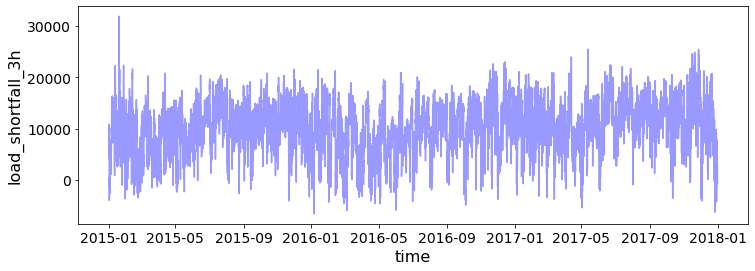

In [13]:
# plot relevant feature interactions
fig,ax =  plt.subplots(1, 1, figsize = ( 12, 4))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14) # set x and y tick label size
    
# plot `time` against target variable
sns.lineplot(x = "time", y = "load_shortfall_3h", 
             color = 'b', data = df1, alpha=0.4, ax = ax)

The graph has been plotted and seems to display linearity between the two variables, however it is too compact because of the numerous data points (8763 rows). Therefore, we need to break down the time variable further into hours, days, months, seasons and years. This will potentially provide more information about the changes in **load_shortfall_3h** and how it may relate with different time periods; hours, days, months, seasons and years. In the event that a positive correlation is established with these new tertiary variables, they can be added to the data frame to improve accuracy at the modeling stage. 

#### vii) Year vs. Load Shortfall

Plotting the year against load shortfall will offer valuable insights by showing the changes in load shortfall during the years in which this data was recorded:

Text(0.5, 0, 'Year')

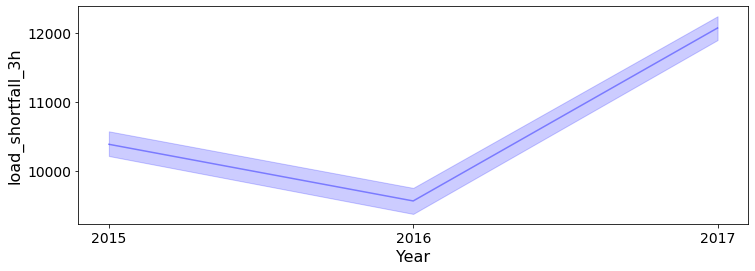

In [14]:
# Years vs Load Shortfall:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot year against target variable
year = df1.time.dt.year
sns.lineplot(x=year, y=df1['load_shortfall_3h'], color='b', alpha=0.4, ax=ax)
plt.xticks(year.unique())
plt.xlabel('Year')

Spain has 4 Seasons: Spring, Summer, Autumn and Winter. In order to create the numeric equivalents of these 4 seasons, we will first use numbers ranging from 1 - 12 to represent each of the 12 months respectively, from Jan - Dec. and thereafter group the numbers to form seasons. For example, the Spring season starts in March and ends in May in Spain.   

In [15]:
# Seasons of the Year
spring = (3, 4, 5) # spring: March - May
summer = (6, 7, 8) # summer: June - August
autumn = (9, 10, 11) # September - November
winter = (12, 1, 2) # December - February

# empty list to hold seasons 
# as they appear by each row
# in the dataframe
seasons = [] 

for x in list(df.time.dt.month): # iterate over the month extract from the time column
    if x in spring:
        seasons.append(1) # append 1 to seasons if month in spring
    elif x in summer:
        seasons.append(2) # append 2 to seasons if month in summer
    elif x in autumn:
        seasons.append(3) # append 3 to seasons if month in autumn
    else:
        seasons.append(4) # append 4 to seasons if month in winter

##### Season Encoding
-------------------
| Season | Code |
|:-----: | :-----: |
| Spring | 1 |
| Summer | 2 |
| Autumn | 3 |
| Winter | 4 |

We can now see how the load shortfall changes with the seasons using a Line Graph:

Text(0.5, 0, 'Season')

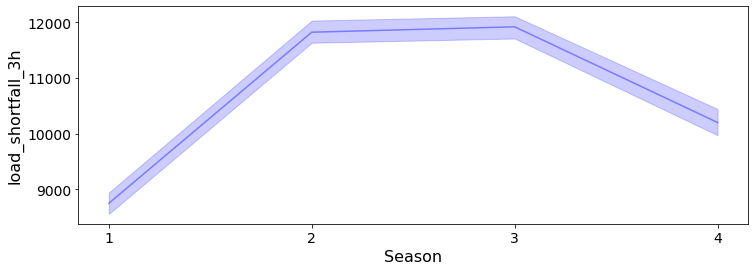

In [16]:
# Plotting a line graph:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    
# plot seasons against target variable (load_shortfall_3h)
sns.lineplot(x=seasons, y=df1.load_shortfall_3h, color='b', alpha=0.4)
plt.xticks([1, 2, 3, 4])
plt.xlabel('Season')

The above numerical encoding is done for each of the seasons respectively. `Spring=1, Summer=2, Autumn=3, Winter=4`. 
The above plot shows us that load shortfall rises throughout __Spring__ and reaches a plateau during __Summer__. It then begins a gradual descent through __Autumn__ and into __Winter__. 

#### viii) Month vs. Load Shortfall

We will plot the months of the year against load shortfall. It will show the changes in load shortfall through the months of the year.

Text(0.5, 0, 'Month')

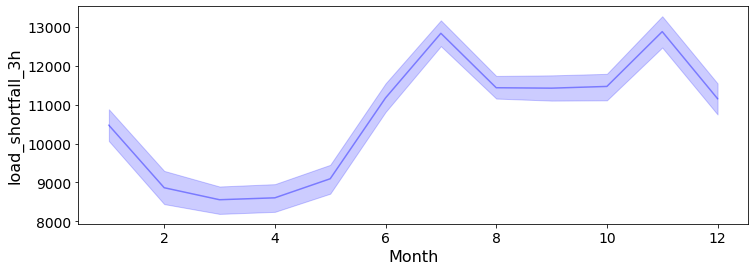

In [17]:
# Months vs. Load shortfall
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot month against target variable (load_shortfall_3h)
month = df1.time.dt.month
sns.lineplot(x=month, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Month')

The load shortfall is at its lowest at **month 3 (March)** and peaks duriing both **month 7 (July) and month 11 (November)**.

#### ix) Day of the Week vs. Load Shortfall:

We can also see how the load shortfall changes with the days of the week using a Line Graph:

Text(0.5, 0, 'Day of Week')

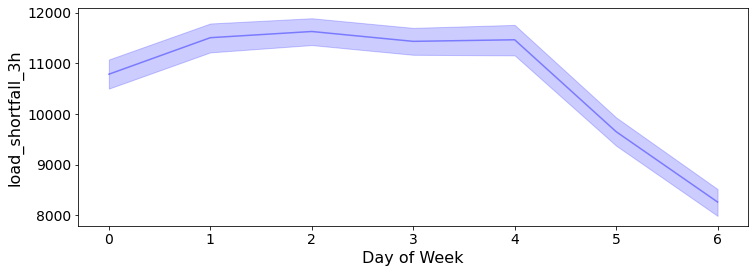

In [18]:
# Plotting Line Graph
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot weekdays against target variable (load_shortfall_3h)
weekdays = df1.time.dt.weekday
sns.lineplot(x=weekdays, y=df1.load_shortfall_3h, color='b', alpha=0.4)
plt.xlabel('Day of Week')

##### WeekDay Encoding
-------------------
| WeekDay | Code |
|:-----: | :-----: |
| Monday | 0 |
| Tuesday | 1 |
| Wednesday | 2 |
| Thursday | 3 |
| Friday | 4 |
| Saturday | 5 |
| Sunday | 6 |

The Line Graphs are getting progressively insightful. We can see that the load shortfall decreases from Friday into the weekend, Saturday and Sunday. This encoding takes Monday (0), as the first day of the week.

#### x) Hour of Day vs. Load Shortfall:

Also using a Line Graph, we can see how the load shortfall changes with the hours of the day: 

Text(0.5, 0, 'Hour of Day')

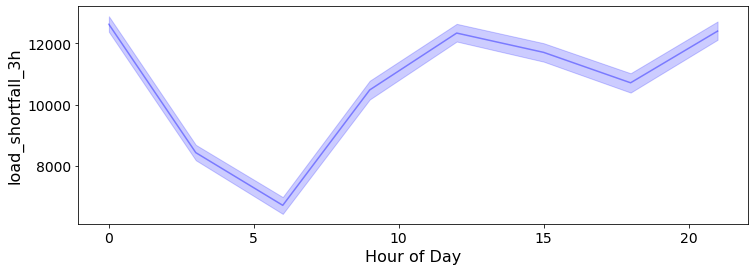

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    
# plot hour of day against target variable (load_shortfall_3h)
hour_of_day = df1.time.dt.hour
sns.lineplot(x=hour_of_day, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Hour of Day')

We can observe that the load shortfall decreases between 12AM (Midnight) and 6AM. 

#### xi) Day of Year vs. Load Shortfall:

Additional insights can be obtained by looking at how the load shortfall changes with the days of the year: 

Text(0.5, 0, 'Day of Year')

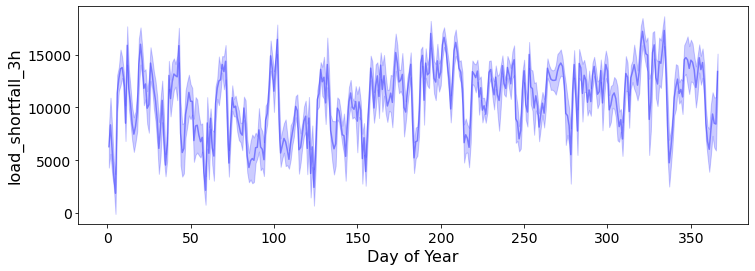

In [20]:
# Day of Year vs. load shortfall
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot year against target variable (load_shortfall_3h)
day_of_year = df1.time.dt.dayofyear
sns.lineplot(x=day_of_year, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Day of Year')

#### xii) Day of the Month vs. Load Shortfall:

We can also look at how the load shortfall changes with the days of the month: 

Text(0.5, 0, 'Day of Month')

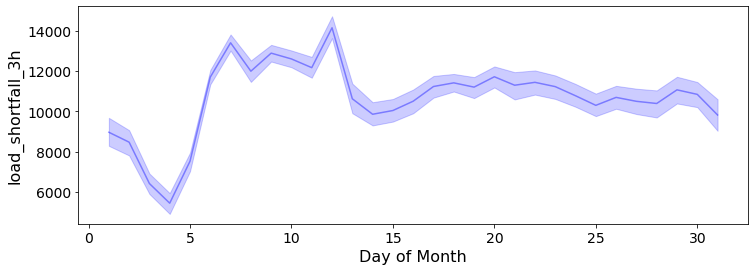

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    
# plot day of month against target variable (load_shortfall_3h)
day_of_month = df1.time.dt.day
sns.lineplot(x=day_of_month, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Day of Month')

According to the plot above, the loadshortfall is fairly low during the first 7 days (Week 1) of the Month

#### xiii) Week of the Year vs. Load Shortfall:

We can also have a plot showing the changes in load shortfall against the week of the year:

Text(0.5, 0, 'Week of Year')

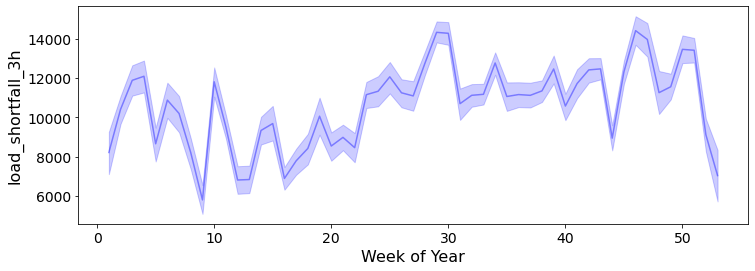

In [22]:
# Week of Year vs. Load Shortfall:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot week of year against target variable (load_shortfall_3h)
week_of_year = df1.time.dt.weekofyear
sns.lineplot(x=week_of_year, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Week of Year')

In [23]:
# getting the hour of the week
# there are 168 hours in a week
# empty list to hold the hour of the week 
weeks_hours = []

# get the unique years in the dataframe from the time column
years = list(df.time.dt.year.unique()) 

# this loop goes over every year represented in the column
# then isolates each year in a dataframe 
for year in years: 
    week = []
    df2 = pd.DataFrame(df.time.loc[lambda x: x.dt.year == year], columns=['time'])
    
    # iterating over the number of weeks in the year (normally 52 weeks)
    # we iterate over number of observations per week, multiplied by 3
    # because we're starting from the 3rd hour and skipping by 3
    # 3 is added to the number of observations to include the last observation.
    for j in range(len(df2.time.dt.week.unique())+1):
        for i in range(3, 3*len(df2.time.loc[lambda x: x.dt.week == j]) + 3, 3):
            week.append(i) # each hour is appended to week
        
    weeks_hours.append(week) # each week is appended to weeks_hours

# the length of the weeks_hours is 3
# because we got the hour of the weeks for 3 years
# here, we merge them into 1 list
hours_weeks = weeks_hours[0] + weeks_hours[1] + weeks_hours[2]

#### xiv) Hour of the Week vs. Load Shortfall:

Text(0.5, 0, 'Hour of Week')

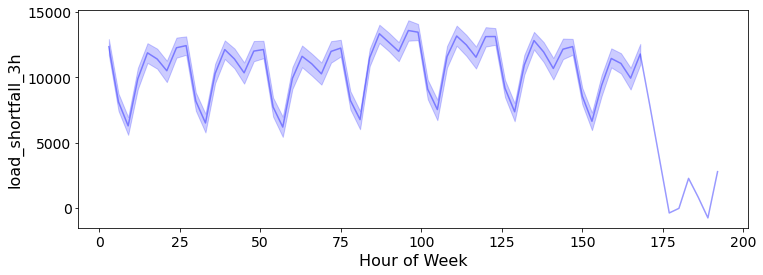

In [24]:
# plotting hour of week vs. load shortfall:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot hour of week against target variable (load_shortfall_3h)
sns.lineplot(x=hours_weeks, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Hour of Week')

__NOTE-__ There are 168 hours in a week, but on a leap year, there are 190 hours. 2016 is a leap year which is why the graph extends further than 175

#### xv) Hour of the Year vs. Load Shortfall:

Our final time-related plot will be hour of the year agaist the load shortfall: 

In [25]:
# Deriving hour of the year:
year_hour_2015 = []
year_hour_2016 = []
year_hour_2017 = []

# iterate over the length of the year multiply by 3
# add 3 to get the last value of the year
# range from 3 and skip by 3 because we are dealing 
# with a 3-hourly dataset
for i in range(3, 3*len(df1.time.loc[lambda x: x.dt.year == 2015])+3, 3):
    year_hour_2015.append(i)

for i in range(3, 3*len(df1.time.loc[lambda x: x.dt.year == 2016])+3, 3):
    year_hour_2016.append(i)

for i in range(3, 3*len(df1.time.loc[lambda x: x.dt.year == 2017])+3, 3):
    year_hour_2017.append(i)

# combine the 3 lists here to get a single list
year_hour_all = year_hour_2015 + year_hour_2016 + year_hour_2017 

Text(0.5, 0, 'Hour of Year')

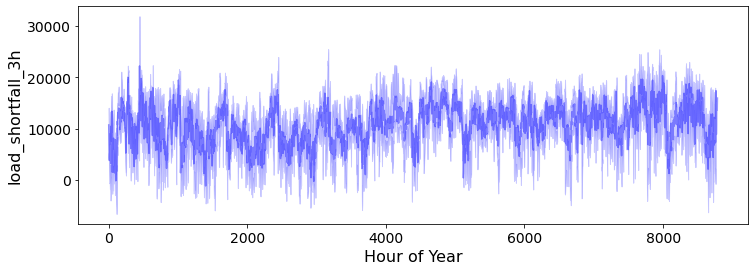

In [26]:
# plotting hour of year vs. load shortfall:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# plot hour of year against target variable (load_shortfall_3h)
sns.lineplot(x=year_hour_all, y=df1.load_shortfall_3h, color='b', alpha=0.4, ax=ax)
plt.xlabel('Hour of Year')

#### xvi) PLotting Feature Distributions:

The next step in our EDA will be to examine the distribution of the Features we have:

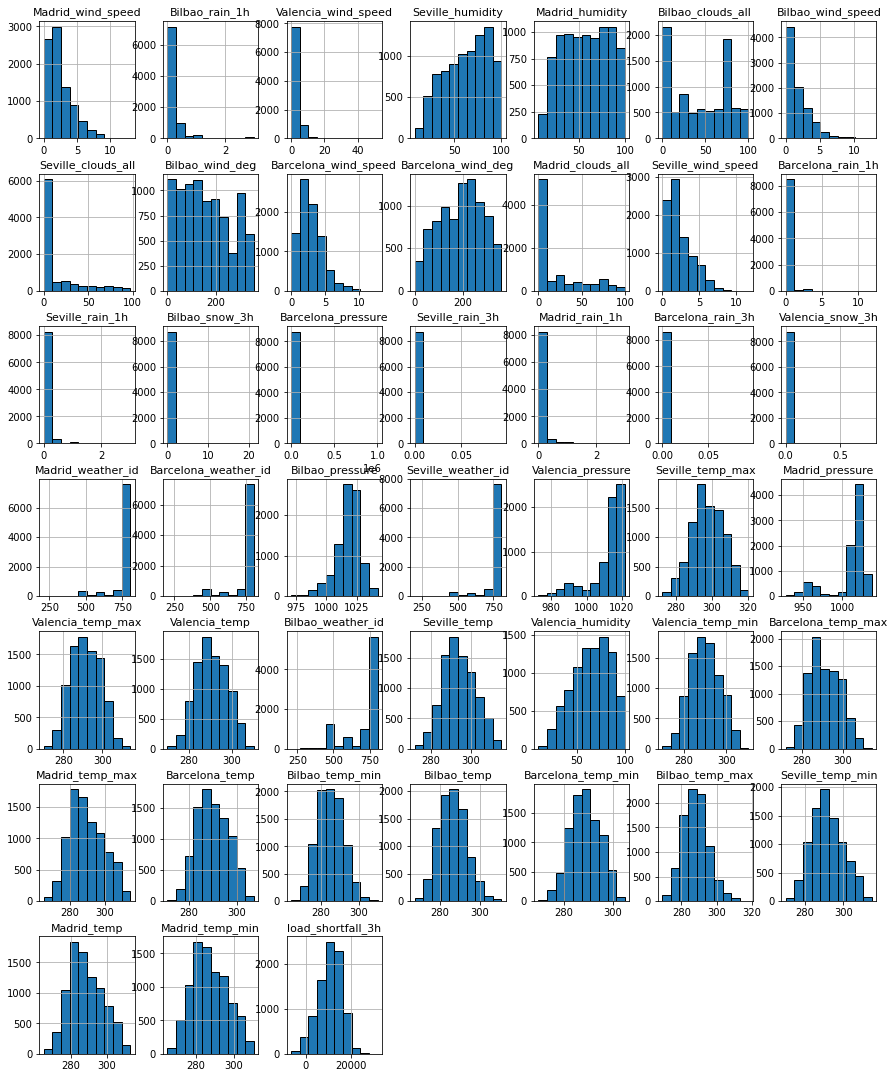

In [27]:
# plotting feature distributions:
params = {'ytick.labelsize': 10,
         'xtick.labelsize': 10}

# updating plt rc params for this visual
plt.rcParams.update(params) 

# extracting only variables that are floats
features = df1.select_dtypes(include='floating').columns

# creating the plot
ax = df1[features].hist(figsize=(15, 19), ec='k')
[x.title.set_size(11) for x in ax.ravel()]

plt.show()

From the above plots it has been confirmed that time as a variable correlated with load shortfall. With this can include the tertiary Time variables in our data frame, with confidence. 

Also, this distribution shows us that there are features that are heavily right skewed (features that represent rainfall, cloud cover and snowfall) which can be explained by the presence of large number of zero(0) values than there are positive values. The few positive values will be treated as outliers and that will affect our regression based models. This will be handled in feature engineering.

The next few plots will highlight the categorical feature interactions with the dependent variable.

#### xvii) Seville Pressure & Valencia Wind Deg. vs. Load Shortfall:

We will create some boxplots to show relationship that our categorical features have with the load shortfall (target variable).

<AxesSubplot:xlabel='Seville_pressure', ylabel='load_shortfall_3h'>

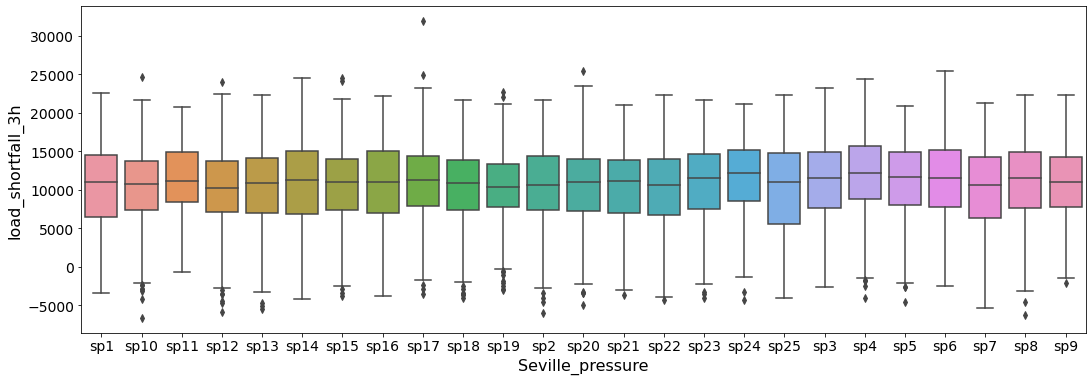

In [28]:
# Seville Pressure vs. Load Shortfall:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
sns.boxplot(df1['Seville_pressure'].sort_values(),df1['load_shortfall_3h'])

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

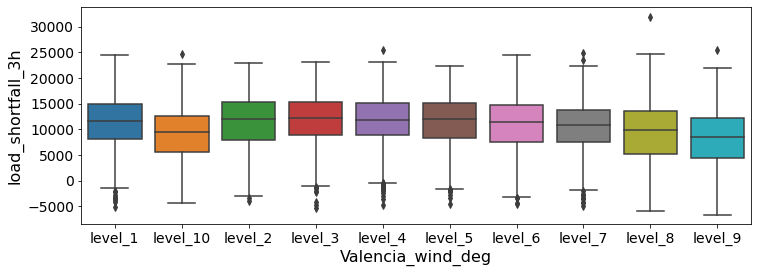

In [29]:
# Valencia_Wing_Deg vs. Load Shortfall:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
sns.boxplot(df1['Valencia_wind_deg'].sort_values(),df1['load_shortfall_3h'])

Text(0, 0.5, '')

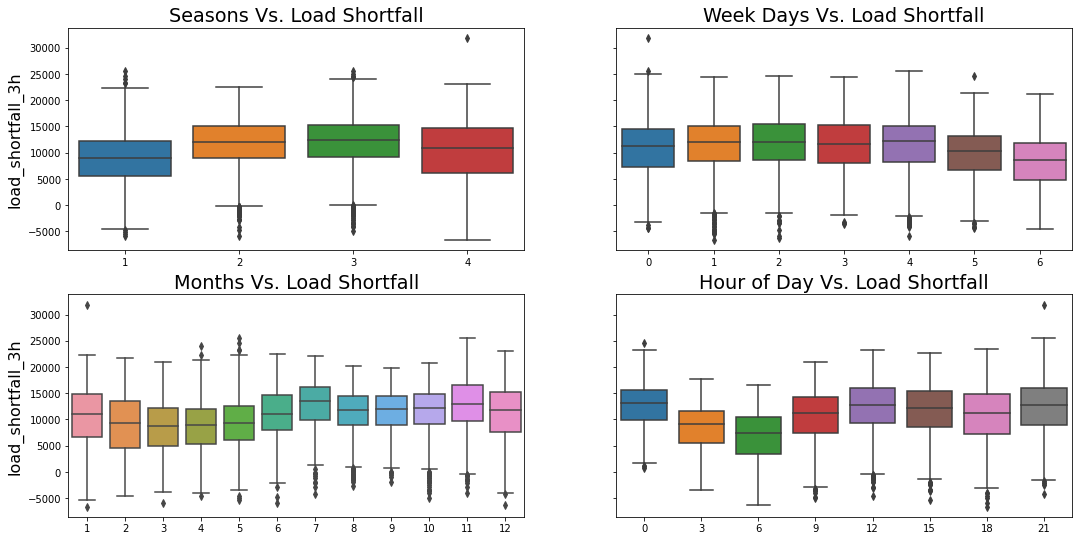

In [30]:
# Box plots for seasons, Weekdays, Months and Hour of Day
fig, ax = plt.subplots(2, 2, figsize=(18, 9), sharey='row')
sns.boxplot(seasons,df1['load_shortfall_3h'], ax = ax[0][0])
ax[0, 0].set_title("Seasons Vs. Load Shortfall")
                
sns.boxplot(weekdays, df1['load_shortfall_3h'], ax = ax[0][1])
ax[0, 1].set_title("Week Days Vs. Load Shortfall")
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

sns.boxplot(month, df1['load_shortfall_3h'], ax = ax[1][0])
ax[1, 0].set_title("Months Vs. Load Shortfall")
ax[1, 0].set_xlabel('')

sns.boxplot(hour_of_day, df1['load_shortfall_3h'], ax = ax[1][1])
ax[1, 1].set_title("Hour of Day Vs. Load Shortfall")
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

#### xviii) Correlation Heat Map

We will conclude our EDA with a *correlation heatmap*, to see what kind of correlation our dependent variables have with each other and also with the load shortfall.

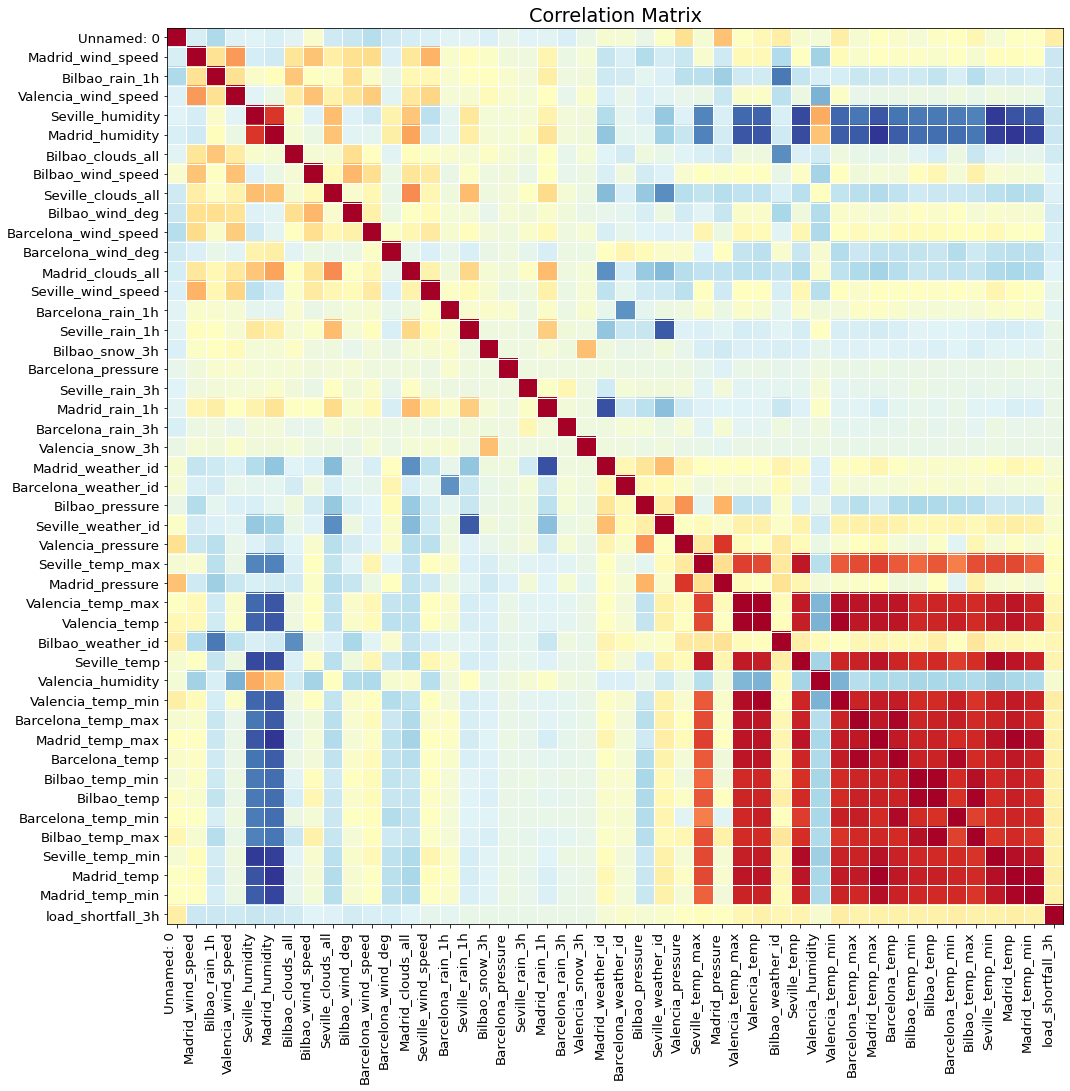

In [31]:
# evaluate correlation
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plot_corr(df1.corr(), xnames = df1.corr().columns, ax = ax);
plt.xticks(rotation=90)
plt.show()

There are many positive correlations that can be observed among the independent variables. There are also weak negative and weak positive correlations between the independent and dependent variable. We shall proceed into the Data Engineering stage to prepare our data for modeling. Because strong correlations are not a hard requirement for predictive modeling. 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Data Engineering is a necessary step because with it, we will be able to tidy up our dataset through several steps in preparation for model building. 

#### i) Drop Unnecessary Columns:

The first step in cleaning our data will be to remove any columns that we find unnecessary. In our case, the second column of our DataSet, Unnamed: 0 does not actually contribute any real observations to the dataset but is instead a duplicate of the data frame's index. Therefore, it must be dropped.

In [32]:
# This column is redundant:
df1 = df1.drop(['Unnamed: 0'], axis=1)

#### ii) Creating New Features:

After establishing the relevance of our EDA's tertiary features and their subsequent plots, we need to create and add them into the data frame as new features.

In [33]:
#create new features
def create_new_features(data, how = hours_weeks, hoy= year_hour_all):
    
    spring = (3, 4, 5)
    summer = (6, 7, 8)
    autumn = (9, 10, 11)
    winter = (12, 1, 2)
    seasons = [1 if x in spring else 2 if x in summer else 3 if x in autumn else 4 for x in list(data.time.dt.month)]
    
    data['dow'] = data['time'].dt.weekday # add day of week to dataframe
    data['woy'] = data['time'].dt.weekofyear # add week of the year to dataframe
    data['doy'] = data['time'].dt.dayofyear # add day of year to dataframe
    data['dom'] = data['time'].dt.day # add day of month to dataframe
    data['month'] = data['time'].dt.month # add month to dataframe
    data['year'] = data['time'].dt.year # add year to dataframe
    data['hour_of_day'] = data['time'].dt.hour # add hour of day to dataframe
    data['seasons'] = seasons # add seasons to dataframe
    data['how'] = how
    data['hoy'] = hoy
    
    ints = list(data.select_dtypes(include='int').columns)

    for col in ints:
        # convert some columns to categorical datatype
        if col in ('seasons', 'dow', 'dom', 'month', 'hour_of_day','lagged_minute', 'minute', 'lagged_month', 'lagged_hour', 'lagged_dow', 'lagged_dom'):
            data[col] = data[col].astype('category')
        else:
            data[col] = data[col].astype('float')
    
    return data.head()

In [34]:
create_new_features(df1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,dow,woy,doy,dom,month,year,hour_of_day,seasons,how,hoy
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3,1.0,1.0,1,1,2015.0,3,4,3.0,3.0
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,3,1.0,1.0,1,1,2015.0,6,4,6.0,6.0
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,3,1.0,1.0,1,1,2015.0,9,4,9.0,9.0
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,3,1.0,1.0,1,1,2015.0,12,4,12.0,12.0
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,3,1.0,1.0,1,1,2015.0,15,4,15.0,15.0


#### iii) Dealing with Missing Values:

Earlier at the EDA stage, we discovered that the column, *Valencia_pressure* is missing some of its values. Such a problem will halt any modeling efforts we apply because no model can be trained on blank data points. We will therefore fill in our missing values, being numerical, with the median value. This will be ideal because the Median, as a measure of central tendency, is robust to outliers.

In [35]:
# to be replaced with data imputation:
df1['Valencia_pressure'] = df1.Valencia_pressure.fillna(df1.Valencia_pressure.median())

#### iv) Converting Categorical Data to Numerical:

We observed that the **Valencia_wind_deg** and **Seville_pressure** columns contain categorical data. Because regression models can only be built using numerical data, we must ensure that our whole data frame conforms to this rule. We must convert all categorical data into numeric through a process known as Dummy Variable Encoding.

In [36]:
# engineer existing features
df1 = pd.get_dummies(df1, drop_first=True, dtype=float)

With this, the number of variables we will work with has basically doubled in number:

In [37]:
df1.shape

(8763, 141)

In [38]:
df1 = df1.drop('time', axis=1)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Columns: 140 entries, Madrid_wind_speed to seasons_4
dtypes: float64(140)
memory usage: 9.4 MB


#### v) Plotting Correlation

For the next step, we will look at the correlation between our new time variables and the load shortfall

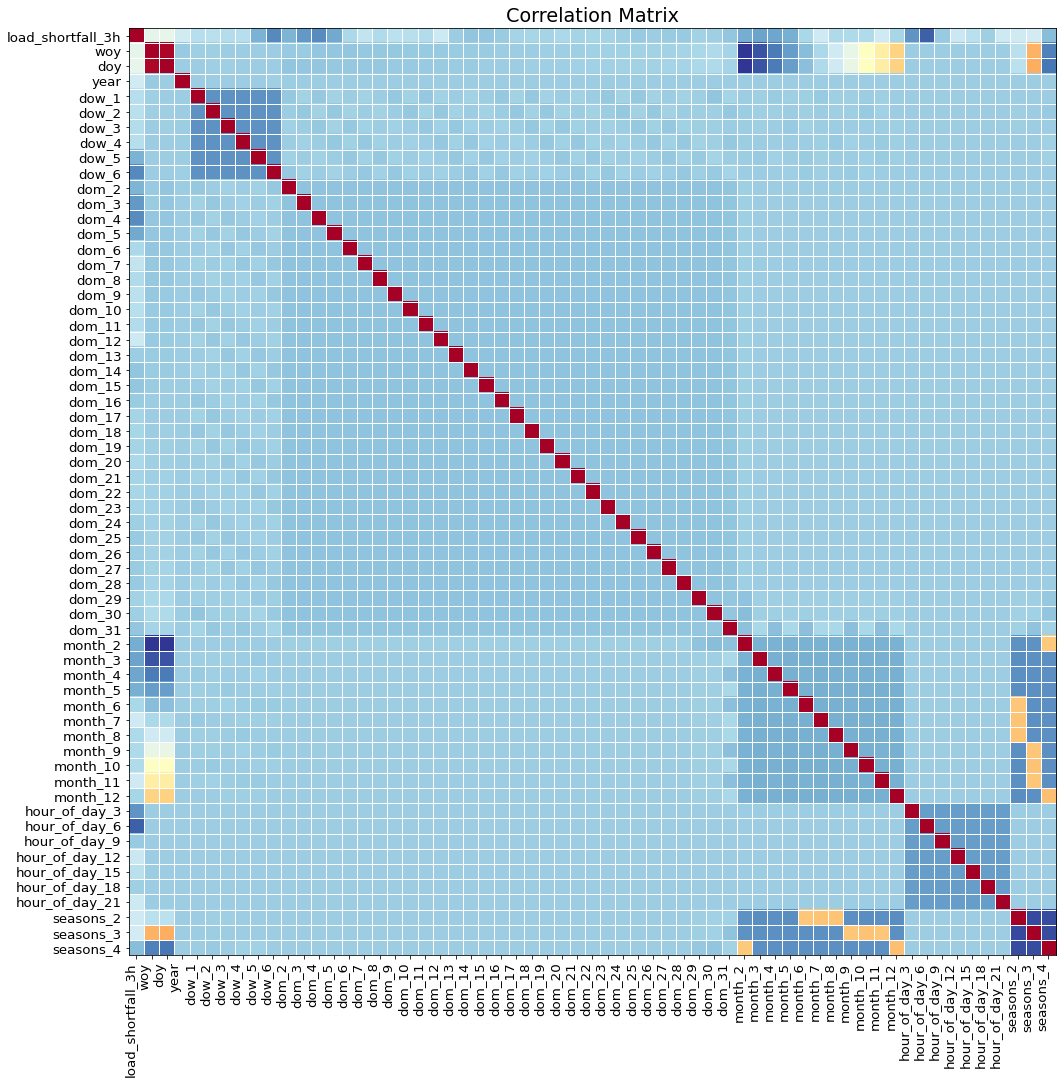

In [40]:
features = [x for x in df1.columns if x.startswith(('dow', 'woy', 'doy', 'dom', 'month', 'year', 'hour_of_day', 'hour_of_year', 'seasons'))]
target = ['load_shortfall_3h']

df2 = df1[target+features]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
plot_corr(df2.corr(), xnames = df2.corr().columns, ax = ax);
plt.xticks(rotation=90)
plt.show()

According to the heatmap, there are a few variables that show strong positive correlation. Week of the Year, day of year and hour of year, etc.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section, we will build and train regression models to predict load shortfall based on the data we have prepared up to this point. The first step will be to prepare the data for modeling by splitting it into two; the Independent/Predictor Variables, (X) and the Dependent Variable, (y).  
On the second step, we will apply Standardization to scale down the data, define our training and testing datasets by performing a train-test split. The datasets will be split as follows; 70% training and 30% testing data. It will be necessary to show our models enough examples(training) so that they will be able to generalize well on unseen data(testing dataset). We will then initialize our regression models, which will be Support Vector Regressor (SVR), Decision Tree Regressor, Random Forest, Lasso and Ridge Regressors. Next, we will train, and evaluate the models. Model evaluation is important because after training, we need to determine how well our models perform on unseen data. For the performance metrics, we will use the Root Mean Squared Error (RMSE), which will be calculated by taking the difference between our model's predictions`(y-hat)` and the ground truth`(actual y)`, square it, and average it out across the whole datasetafter which its Square Root is determined. Finally, we will store our best performing model (lowest MSE) for future deployment. 

#### Splitting Data: 

Let's begin by splitting our data into X (features) and y (target/label)

In [41]:
# split data
y = np.array(df1['load_shortfall_3h'])
X = np.array(df1.drop(['load_shortfall_3h'], axis=1))
y = y.reshape(-1, 1)

#### Apply Standardization: 

In [42]:
scale_X = StandardScaler()
scale_y = StandardScaler()
X = scale_X.fit_transform(X) # standardize X
y = scale_y.fit_transform(y) # standardize y

#### Train - Test Split: 

On this step, we will split our data into a training set and a testing set, assigning a `test size` of `20%`, meaning the 20% of the data will be used to test our models. We will also include a random state of `1`.

In [43]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [44]:
y_test = scale_y.inverse_transform(y_test)

### TRAINING THE MODELS

#### i) SUPPORT VECTOR REGRESSION

Support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. This algorithm acknowledges the presence of non-linearity in the data, with the objective to find a hyperplane in an n-dimensional space that distinctly classifies the data points.

In [45]:
# create one or more ML models
svm_regression =SVR()
svm_regression.fit(X_train, y_train)

y_hat = svm_regression.predict(X_test)
y_hat = y_hat.reshape(-1, 1)
y_hat = scale_y.inverse_transform(y_hat)

#### ii) DECISION TREE 

This is an algoriths that can be used for both classification and Regression problems. Its nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [46]:
# Creating an instance of the Decision tree:
tree = DecisionTreeRegressor(max_depth=9,random_state=1)
tree.fit(X_train, y_train)

y_tree_hat = tree.predict(X_test)
y_tree_hat = y_tree_hat.reshape(-1, 1)
y_tree_hat = scale_y.inverse_transform(y_tree_hat)

#### iii) RANDOM FORESTS REGRESSION

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Therefore it combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [47]:
# Our forest consists of 60 trees with a max depth of 26
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

y_rf_hat = RF.predict(X_test)
y_rf_hat = y_rf_hat.reshape(-1, 1)
y_rf_hat = scale_y.inverse_transform(y_rf_hat)

#### iv) LASSO REGRESSION

**LASSO** stands for (**L**east **A**bsolute **S**hrinkage and **S**election **O**perator). This regression analysis method performs both variable selection and regularization so that the predictive accuracy and interpretability of the statistical model is enhanced.

In [48]:
# Create an instance of the Lasso Regressor:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_lasso_hat = lasso.predict(X_test)
y_lasso_hat = y_lasso_hat.reshape(-1, 1)
y_lasso_hat = scale_y.inverse_transform(y_lasso_hat)

#### v) RIDGE REGRESSION

Rigde Regression is a method of model tuning that is used to analyse data that has multicollinearity problems. It performs L2 regularization. Multicollinearity causes least-squares to be unbiased, and variances - large, and this results in predicted values being far away from the actual values. 

In [49]:
# creating an instance of the Ridge Regressor:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_ridge_hat = ridge.predict(X_test)
y_ridge_hat = y_ridge_hat.reshape(-1, 1)
y_ridge_hat = scale_y.inverse_transform(y_ridge_hat)

#### vi) MODEL EVALUATION

We will begin our model evaluation by comparing our **y_hats** (predicted values) with our actual **y-values** (labels).

In [50]:
# evaluate one or more ML models

# SVR
predictions = pd.DataFrame()
predictions.index = np.arange(len(y_test))
predictions['y_test'] = y_test
predictions['y_hat'] = y_hat

# Decision Tree
predictions['y_tree_hat'] = y_tree_hat

# Random Forest
predictions['y_rf_hat'] = y_rf_hat

# lasso 
predictions['y_lasso_hat'] = y_lasso_hat

# Ridge
predictions['y_ridge_hat'] = y_ridge_hat
predictions.head()

,y_test,y_hat,y_tree_hat,y_rf_hat,y_lasso_hat,y_ridge_hat
0,18097.666667,16689.253831,14493.734723,18379.376667,13790.098933,14801.395909
1,12578.000000,13430.824472,13862.926070,12140.490000,11500.928323,11006.141284
2,8510.666667,15969.502056,14493.734723,11219.663333,13984.884603,14776.426470
3,16473.666667,14394.668997,10118.838776,12243.993333,13135.750462,13000.575402
4,8849.666667,7793.335202,2723.333333,8687.730000,7315.171712,7212.116409


We will also use Scatter Plots to examine and compare the fit of the various models we have used.

Text(0.5, 1.0, 'Ridge Regression')

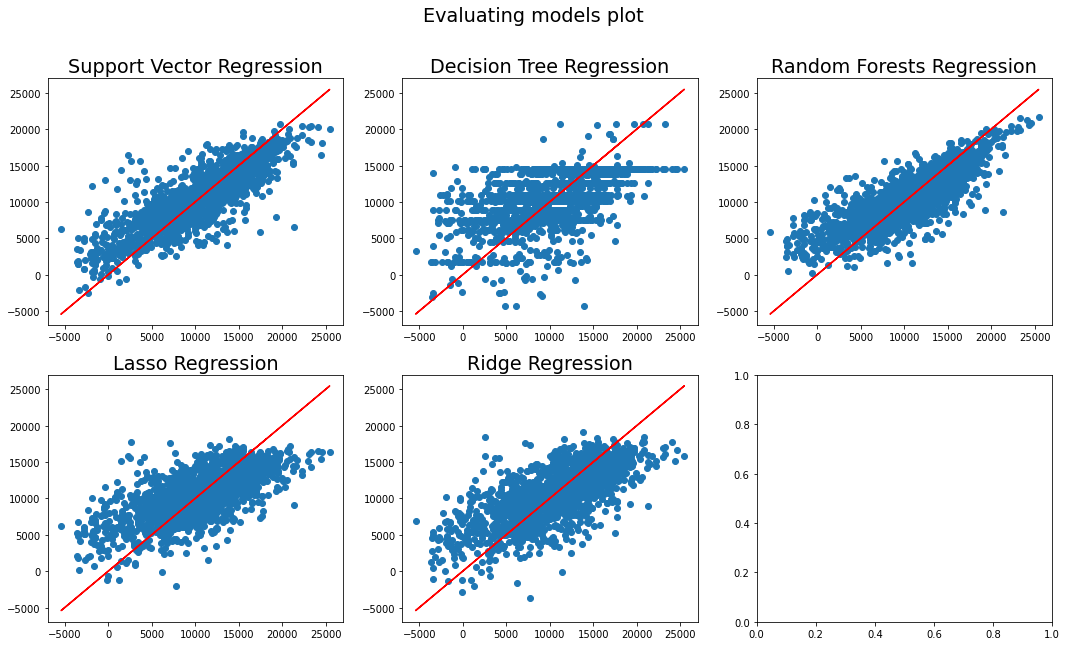

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Evaluating models plot')

#Plot Support Vector
axes[0, 0].scatter(y_test, predictions['y_hat'])
axes[0, 0].plot(y_test, y_test, color='r')
axes[0, 0].set_title("Support Vector Regression")

#Plot Decision Tree
axes[0, 1].scatter(y_test, predictions['y_tree_hat'])
axes[0, 1].plot(y_test, y_test, color='r')
axes[0, 1].set_title("Decision Tree Regression")

#Plot Random Forest
axes[0, 2].scatter(y_test, predictions['y_rf_hat'])
axes[0, 2].plot(y_test, y_test, color='r')
axes[0, 2].set_title("Random Forests Regression")

#Plot Lasso
axes[1, 0].scatter(y_test, predictions['y_lasso_hat'])
axes[1, 0].plot(y_test, y_test, color='r')
axes[1, 0].set_title("Lasso Regression")

#Plot Ridge
axes[1, 1].scatter(y_test, predictions['y_ridge_hat'])
axes[1, 1].plot(y_test, y_test, color='r')
axes[1, 1].set_title("Ridge Regression")

From the plots above it is worth noting that the Support Vector Regression model produced a better fit, with a more symmetrical split through the datapoints.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


At this stage, we need to assess model performance using RMSE (Root Mean Squared Error) as the Metric. Afterwards, we will prepare a table displaying the RMSE score for each model.

In [52]:
# 
X_test = scale_X.inverse_transform(X_test)
X_train = scale_X.inverse_transform(X_train)

In [53]:
# Compare model performance
results = [np.sqrt(mean_squared_error(y_hat, y_test)),
           np.sqrt(mean_squared_error(y_tree_hat, y_test)),
           np.sqrt(mean_squared_error(y_lasso_hat, y_test)),
          np.sqrt(mean_squared_error(y_rf_hat, y_test)),
          np.sqrt(mean_squared_error(y_ridge_hat, y_test))]

model_compare = pd.DataFrame()
model_compare['model'] = ["Support Vector Regression","Decision Tree Regression","Lasso Regression", "Random Forest", "Ridge Regression"]
model_compare['RMSE'] = results
model_compare.reset_index
model_compare.sort_values(by=['RMSE'], inplace=True)

model_compare

,model,RMSE
0,Support Vector Regression,2829.730672
3,Random Forest,2953.394494
4,Ridge Regression,3655.550179
2,Lasso Regression,3727.151414
1,Decision Tree Regression,4230.424010


It is useful to create graphical representations of our models' performance. For this, we will use a bar chart.

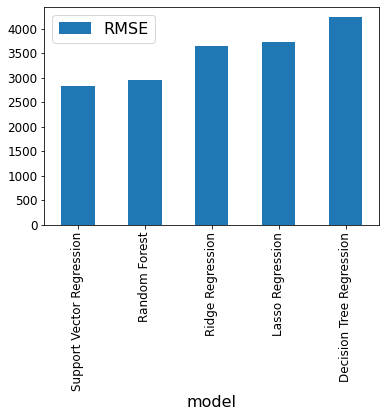

In [54]:
ax = model_compare.plot.bar(x='model', y='RMSE')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
plt.show()

### TESTING MODEL ON TEST DATASET

Now we should apply our model to the test data frame. We will apply the same data engineering decisions as with the train data frame that we used for model building. This will enforce coherence between both data frames and will enable the generation of predictions.

In [55]:
# Loading Data
df_test = pd.read_csv('df_test.csv')

In [56]:
# Display dataframe information e.g., datatypes , missing values, etc.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [57]:
# Assigning the correct Datatypes:
df_test[['Bilbao_snow_3h', 'Valencia_snow_3h']] = df_test[['Bilbao_snow_3h', 'Valencia_snow_3h']].astype('float')

In [58]:
# Filling in Missing Values:
df_test.Valencia_pressure = df_test.Valencia_pressure.fillna(df_test.Valencia_pressure.median())
# change the data type to datetime
df_test.time = pd.to_datetime(df_test.time)

# drop unwanted column
df_test = df_test.drop(['Unnamed: 0'], axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2920 non-null   datetime64[ns]
 1   Madrid_wind_speed     2920 non-null   float64       
 2   Valencia_wind_deg     2920 non-null   object        
 3   Bilbao_rain_1h        2920 non-null   float64       
 4   Valencia_wind_speed   2920 non-null   float64       
 5   Seville_humidity      2920 non-null   float64       
 6   Madrid_humidity       2920 non-null   float64       
 7   Bilbao_clouds_all     2920 non-null   float64       
 8   Bilbao_wind_speed     2920 non-null   float64       
 9   Seville_clouds_all    2920 non-null   float64       
 10  Bilbao_wind_deg       2920 non-null   float64       
 11  Barcelona_wind_speed  2920 non-null   float64       
 12  Barcelona_wind_deg    2920 non-null   float64       
 13  Madrid_clouds_all 

In [59]:
year_hour_test = [i for i in range(3, 3*len(df_test.time.loc[lambda x: x.dt.year == 2018])+3, 3)]

In [60]:
# getting the hour of the week
# there are 168 hours in a week
# empty list to hold the hour of the week 
weeks_hours = []

# get the unique years in the dataframe from the time column
years = list(df_test.time.dt.year.unique()) 

# this loop goes over every year represented in the column
# then isolates each year in a dataframe 
for year in years: 
    week = []
    df2 = pd.DataFrame(df_test.time.loc[lambda x: x.dt.year == year], columns=['time'])
    
    # iterating over the number of weeks in the year (normally 52 weeks)
    # we iterate over number of observations per week, multiplied by 3
    # because we're starting from the 3rd hour and skipping by 3
    # 3 is added to the number of observations to include the last observation.
    for j in range(len(df2.time.dt.week.unique())+1):
        for i in range(3, 3*len(df2.time.loc[lambda x: x.dt.week == j]) + 3, 3):
            week.append(i) # each hour is appended to week
        
    weeks_hours.append(week) # each week is appended to weeks_hours

# the length of the weeks_hours is 3
# because we got the hour of the weeks for 3 years
# here, we merge them into 1 list
hours_weeks_test = weeks_hours[0]

In [61]:
# Ceating New Features
create_new_features(df_test, how=hours_weeks_test, hoy=year_hour_test)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,dow,woy,doy,dom,month,year,hour_of_day,seasons,how,hoy
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0.0,1017.333333,0.0,0.0,0.0,0.0,800.0,800.000000,1025.666667,800.000000,1014.666667,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,0,1.0,1.0,1,1,2018.0,0,4,3.0,3.0
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0.0,1020.333333,0.0,0.0,0.0,0.0,800.0,800.333333,1026.666667,800.000000,1014.666667,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,0,1.0,1.0,1,1,2018.0,3,4,6.0,6.0
2,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0.0,1023.000000,0.0,0.0,0.0,0.0,800.0,800.000000,1025.333333,800.333333,1014.666667,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,0,1.0,1.0,1,1,2018.0,6,4,9.0,9.0
3,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0.0,1025.666667,0.0,0.0,0.0,0.0,800.0,800.000000,1025.000000,800.333333,1014.666667,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,0,1.0,1.0,1,1,2018.0,9,4,12.0,12.0
4,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0.0,1026.000000,0.0,0.0,0.0,0.0,800.0,800.333333,1022.333333,800.000000,1014.666667,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,0,1.0,1.0,1,1,2018.0,12,4,15.0,15.0


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2920 non-null   datetime64[ns]
 1   Madrid_wind_speed     2920 non-null   float64       
 2   Valencia_wind_deg     2920 non-null   object        
 3   Bilbao_rain_1h        2920 non-null   float64       
 4   Valencia_wind_speed   2920 non-null   float64       
 5   Seville_humidity      2920 non-null   float64       
 6   Madrid_humidity       2920 non-null   float64       
 7   Bilbao_clouds_all     2920 non-null   float64       
 8   Bilbao_wind_speed     2920 non-null   float64       
 9   Seville_clouds_all    2920 non-null   float64       
 10  Bilbao_wind_deg       2920 non-null   float64       
 11  Barcelona_wind_speed  2920 non-null   float64       
 12  Barcelona_wind_deg    2920 non-null   float64       
 13  Madrid_clouds_all 

In [63]:
# Dummy Variable Encoding (Converting Categorical Data into Numerical)
df_test = pd.get_dummies(df_test, drop_first=True, dtype=float)

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Columns: 140 entries, time to seasons_4
dtypes: datetime64[ns](1), float64(139)
memory usage: 3.1 MB


In [65]:
# Dropping the time feature
df_test1 = df_test.drop('time', axis=1)

In [66]:
# Apply Standardization
scale = StandardScaler()
df_sc3 = scale.fit_transform(df_test1)

### Support Vector On Test Data

In [67]:
# Using the SVR model to make Predictions:
y_hat_test = svm_regression.predict(df_sc3)
y_hat_test = y_hat_test.reshape(-1, 1)
y_hat_test = scale_y.inverse_transform(y_hat_test)

In [68]:
# Creating data frame for te predicted values
predictions = pd.DataFrame()
predictions.index = np.arange(len(y_hat_test))
predictions['time'] = df_test.time
predictions['load_shortfall_3h'] = y_hat_test
predictions.set_index('time', inplace=True)

In [69]:
# Display dataframe
predictions.head()

,load_shortfall_3h
time,
2018-01-01 00:00:00,7940.530137
2018-01-01 03:00:00,4816.150302
2018-01-01 06:00:00,3754.178371
2018-01-01 09:00:00,8272.342604
2018-01-01 12:00:00,9431.523629


In [70]:
# Saving Predictions as a .csv file:
predictions.to_csv("predictions.csv")

### Save Model

In [71]:
model_save_path = "model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svm_regression,file)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### SVR Model Description
In conclusion, our model of choice for the API is the Support Vector Regressor. It produced a lower RMSE (Root Mean Square Error) value of `2829.730672` 

Support Vector Regression (SVR) is a component of Support Vector Machines. It supports both linear and non-linear regressions. 

This method works on the principle of the Support Vector Machine. SVR differs from SVM in this way, SVM is a classifier that is used for predicting discrete categorical labels. SVR is a regressor that is used for predicting continuous ordered variables.

There are 3 key terms that help understand how SVR works:



i) **Hyperplane:** It is a separation line between two data classes in a higher dimension than the actual dimension. 

In SVR it is defined as the line that helps in predicting the target value.



ii) **Kernel:** Regression is performed at a higher dimension in SVR. For that, we need a function that should map the data points into the higher dimension. 

This function is called the `Kernel`.



iii) **Boundary Lines:** These are the two lines that are drawn around the hyperplane at a distance of $\epsilon$ (epsilon). 

It is used to create a margin between the data points.